##          INSURANCE CLAIMS CUSTOMER LIFETIME VALUE PREDICTION<hr>

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy.stats import ttest_ind
import itertools
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

### Load Data

In [2]:
df = pd.read_csv("C:\\Users\\supri\\Downloads\\insurance_claims.csv")

In [3]:
df.shape

(1000, 40)

In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

### Data Preprocessing

#### Handling Missing Values

In [8]:
column_to_drop = '_c39'
df = df.drop(columns = [column_to_drop])

In [9]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_features:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'policy_bind_date': ['2014-10-17' '2006-06-27' '2000-09-06' '1990-05-25' '2014-06-06'
 '2006-10-12' '2000-06-04' '1990-02-03' '1997-02-05' '2011-07-25'
 '2002-05-26' '1999-05-29' '1997-11-20' '2012-10-26' '1998-12-28'
 '1992-10-19' '2005-06-08' '2004-11-15' '2014-12-28' '1992-08-02'
 '2002-06-25' '2005-11-27' '1994-05-27' '1991-02-08' '1996-02-02'
 '2013-12-05' '1990-09-20' '2002-07-18' '1990-02-08' '2014-03-04'
 '2000-02-18' '2008-06-19' '2003-08-01' '1992-04-04' '1991-01-13'
 '2010-08-08' '2003-03-09' '1993-02-03' '2002-11-25' '1997-07-27'
 '1995-05-08' '2012-08-30' '2006-04-30' '2003-04-13' '2007-12-05'
 '2006-08-21' '1990-01-08' '1990-03-18' '2008-01-07' '1997-03-10'
 '2004-01-10' '1994-08-20' '2002-06-02' '1994-04-28' '2014-08-17'
 '2007-08-11' '2008-11-20' '1995-10-18' '1993-05-19' '2005-02-26'
 '1990-02-14' '1993-09-30' '2014-06-10' '2008-10-28' '2007-04-24'
 '1993-12-13' '2011-08-17' '1990-08-20' '1994-02-11' '1994-02-22'
 '2011-08-15' '1998-11-11' '1995

In [10]:
# Replace placeholders for missing values with actual NaN
df.replace(['?', 'None', 'nan'], np.nan, inplace=True)

In [11]:
df1 = df.copy()

In [12]:
# Drop the original datetime columns
df.drop(columns=['policy_bind_date', 'incident_date'], inplace=True)

In [13]:
categorical_cols = df.select_dtypes(include=['object']).columns

# List of columns that were not categorical (numeric columns)
numerical_cols = [col for col in df.columns if col not in categorical_cols]

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Apply KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_encoded), columns=df_encoded.columns)

In [14]:
# Reverse the one-hot encoding process
# Create a copy of the DataFrame
df_reversed = df_imputed.copy()

# Reverse one-hot encoding for each categorical column
for cat_col in categorical_cols:
    # Get the columns that were one-hot encoded for the current categorical column
    cat_encoded_cols = [col for col in df_imputed.columns if col.startswith(cat_col + '_')]
    
    if cat_encoded_cols:
        # Create a new column with the original categorical values
        df_reversed[cat_col] = df_reversed[cat_encoded_cols].idxmax(axis=1).str.replace(f'{cat_col}_', '')
        
        # Drop the one-hot encoded columns
        df_reversed.drop(columns=cat_encoded_cols, inplace=True)

# Add back numerical columns if they are missing
# Ensure all numerical columns are included
for num_col in numerical_cols:
    if num_col not in df_reversed.columns:
        df_reversed[num_col] = df_encoded[num_col]

# Reset index
df_reversed.reset_index(drop=True, inplace=True)

# Check the shape of the final DataFrame
print("Number of columns in the final DataFrame:", df_reversed.shape[1])
print("Columns in the final DataFrame:", df_reversed.columns.tolist())

# Display the head of the DataFrame to verify
print(df_reversed.head())

Number of columns in the final DataFrame: 37
Columns in the final DataFrame: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']
   months_as_customer   age  policy_number  policy_deductable  \
0               328.0  48.0       521585.0             1000.0   
1               228.0  42.0       342868.0             2000.0   
2               134.0  29.0

In [15]:
df = df_reversed

### Exploratory Data Analysis

#### Numerical Features

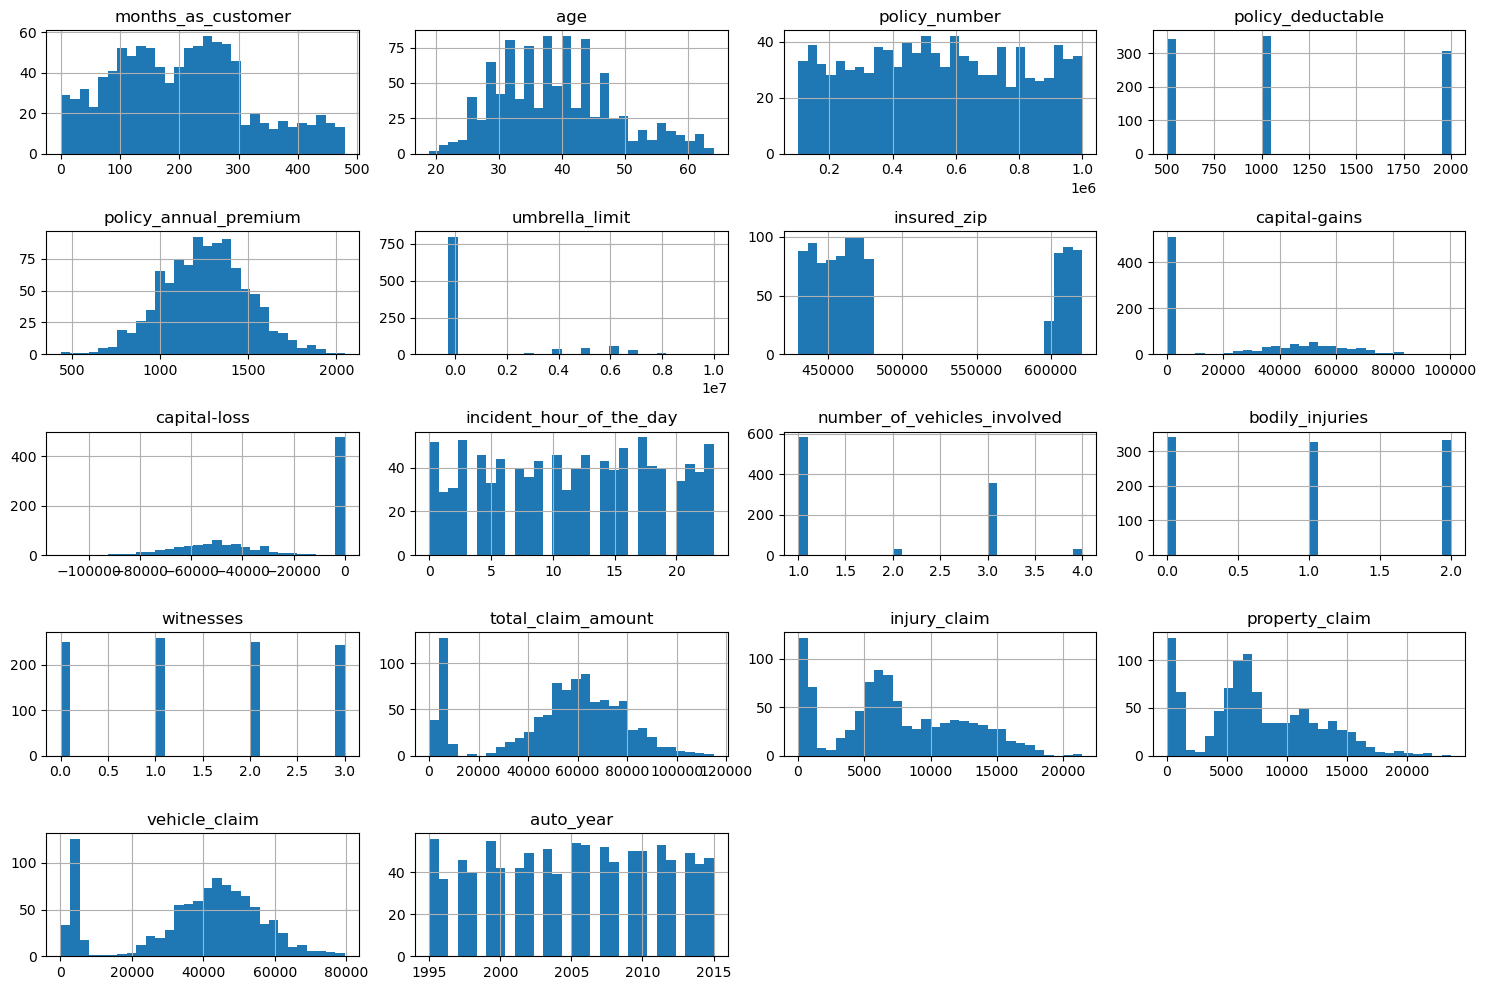

In [16]:
import matplotlib.pyplot as plt

# List of numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Plot histograms
df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

#### Categorical Features

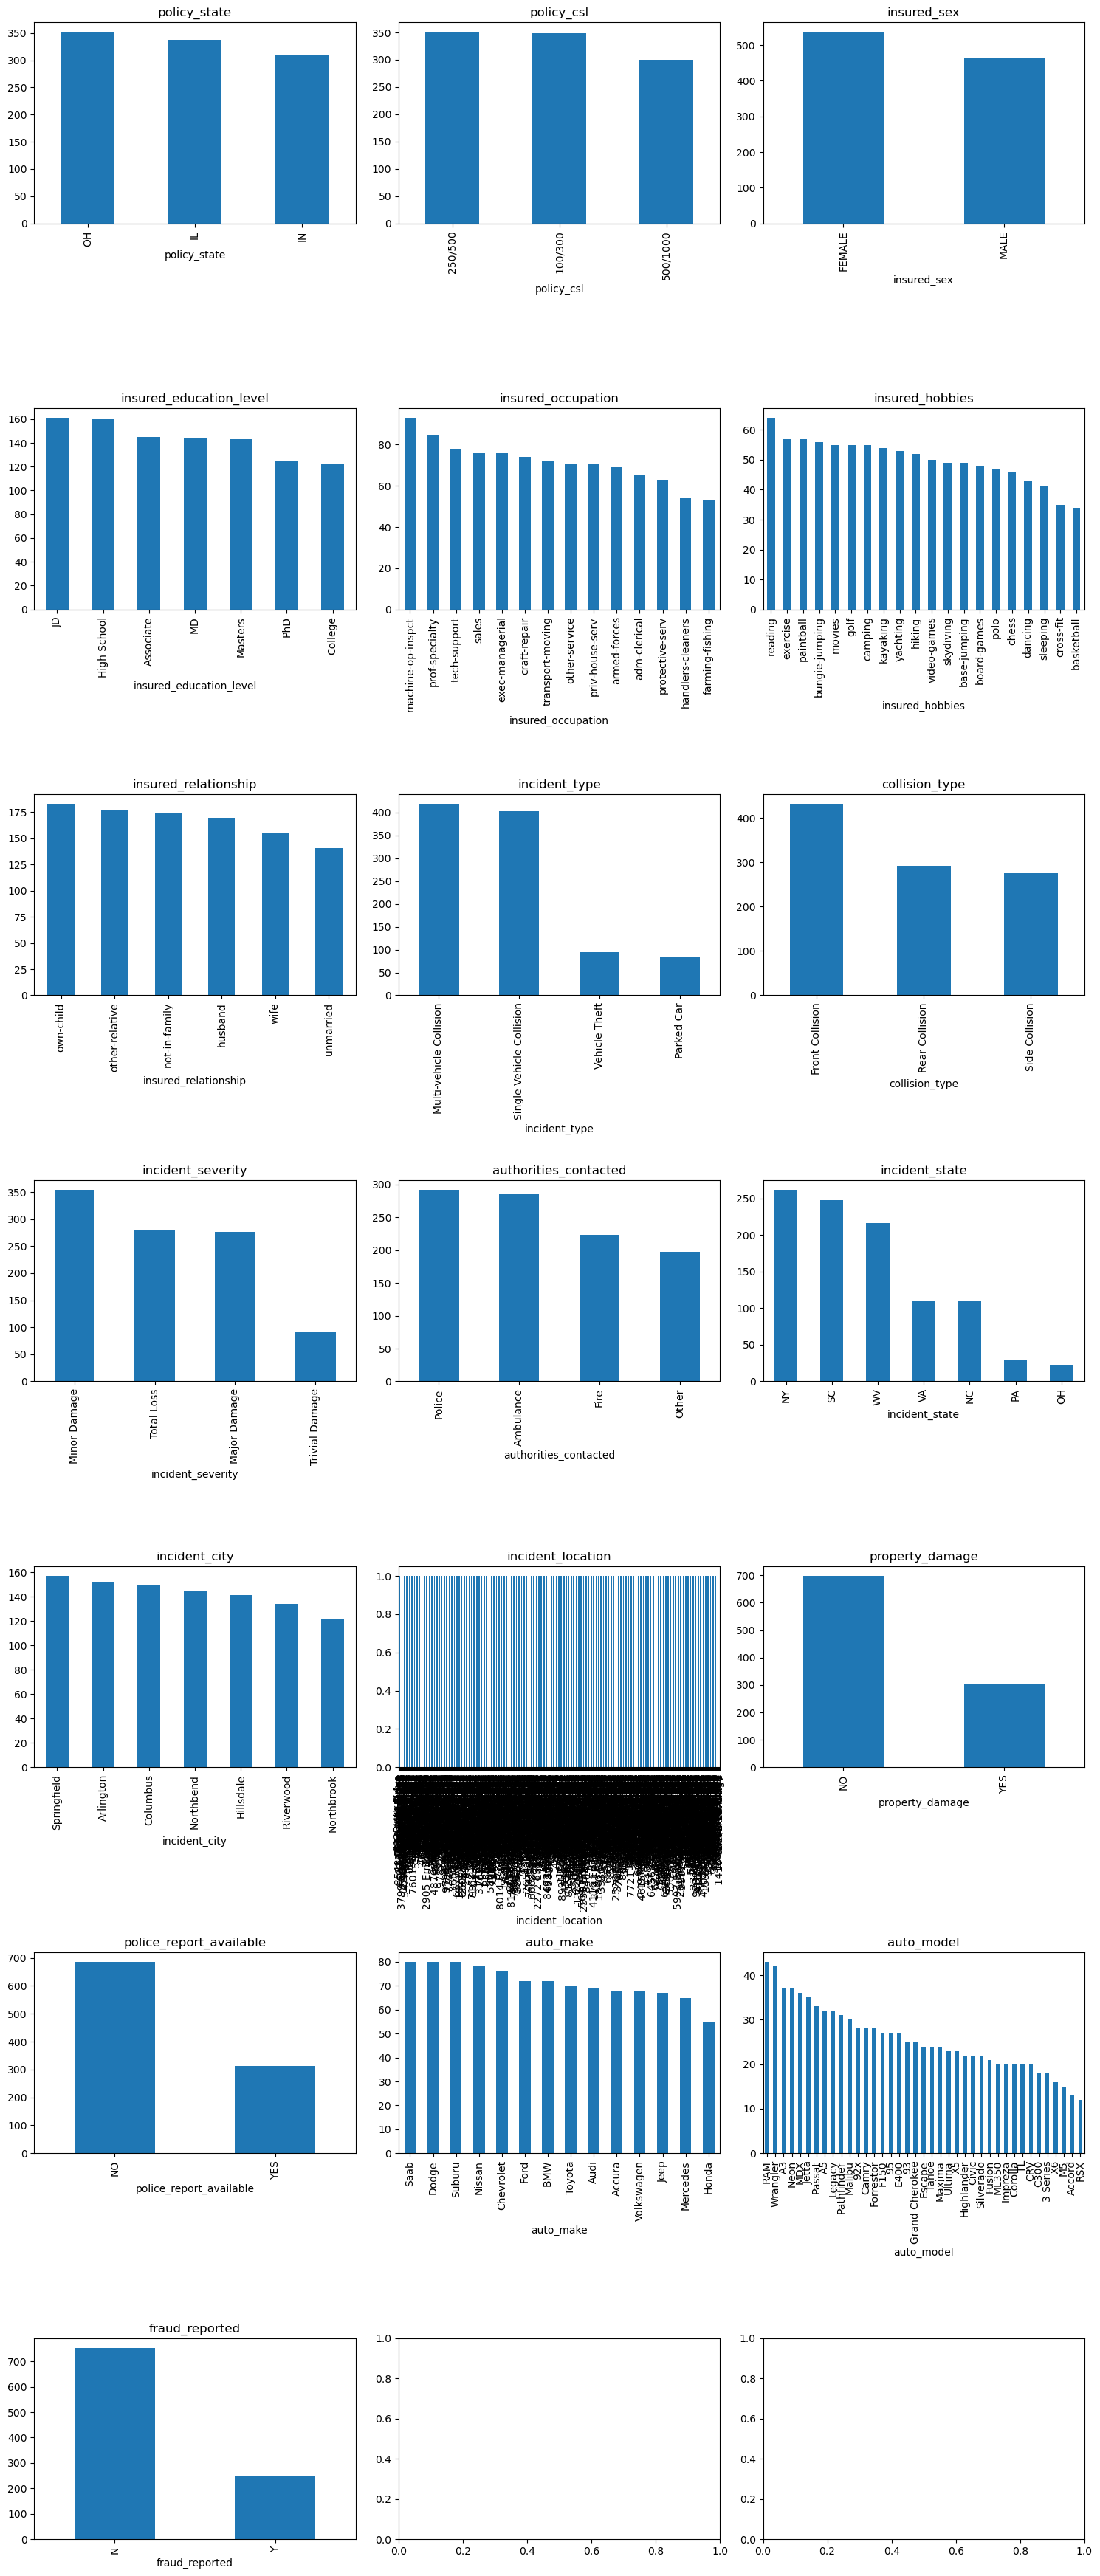

In [17]:
# List of categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Plot count plots
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 35))
for i, feature in enumerate(categorical_features):
    row, col = divmod(i, 3)
    df[feature].value_counts().plot(kind='bar', ax=axes[row, col])
    axes[row, col].set_title(feature)
plt.tight_layout()
plt.show()

#### Correlation Matrix

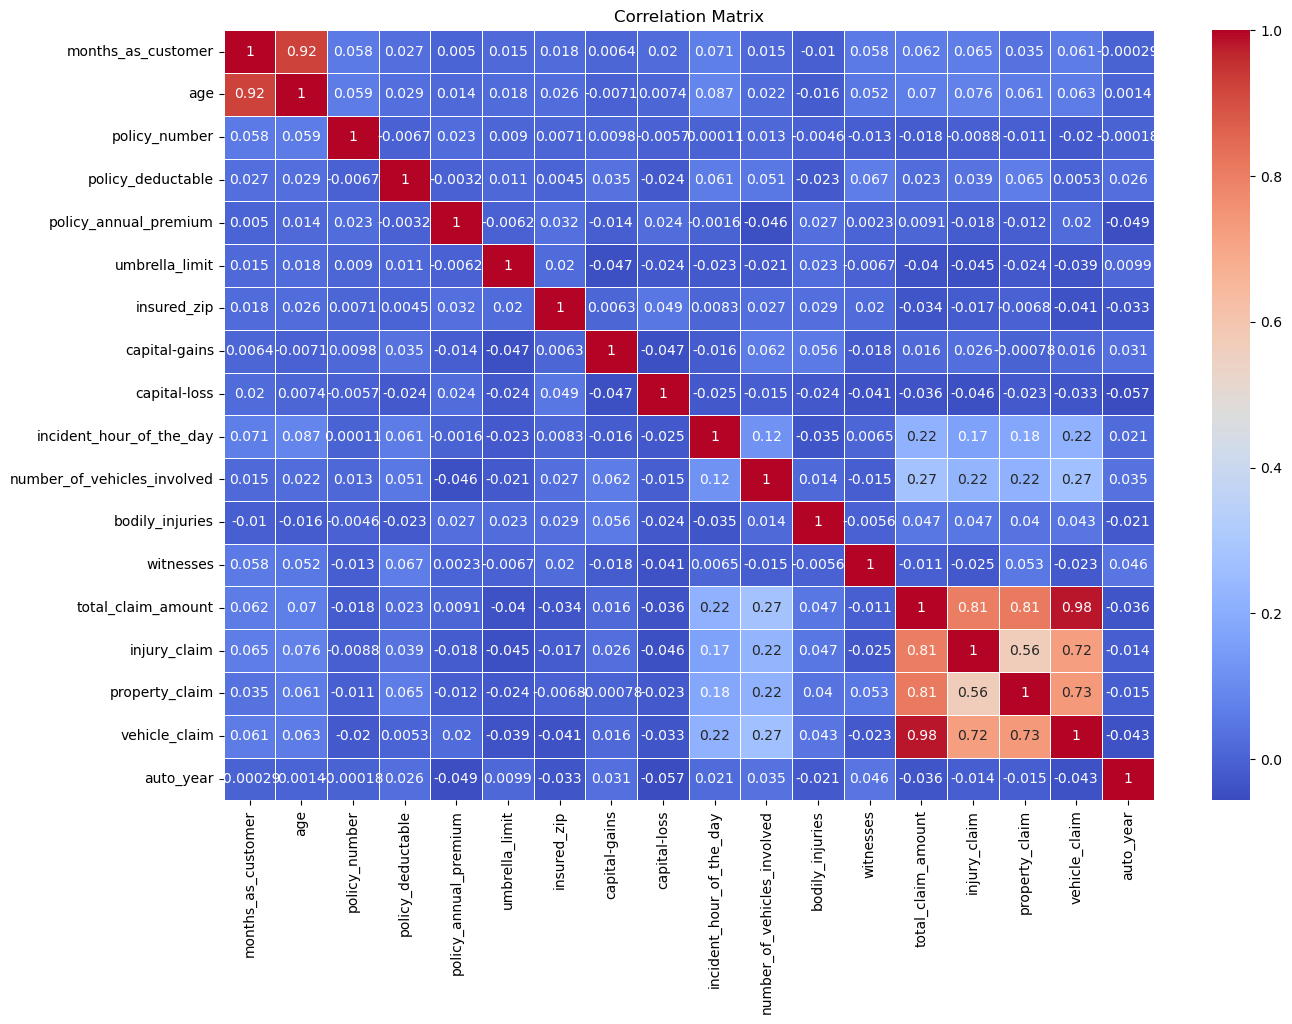

In [18]:
# Compute the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot the heatmap
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


#### Scatter Plot

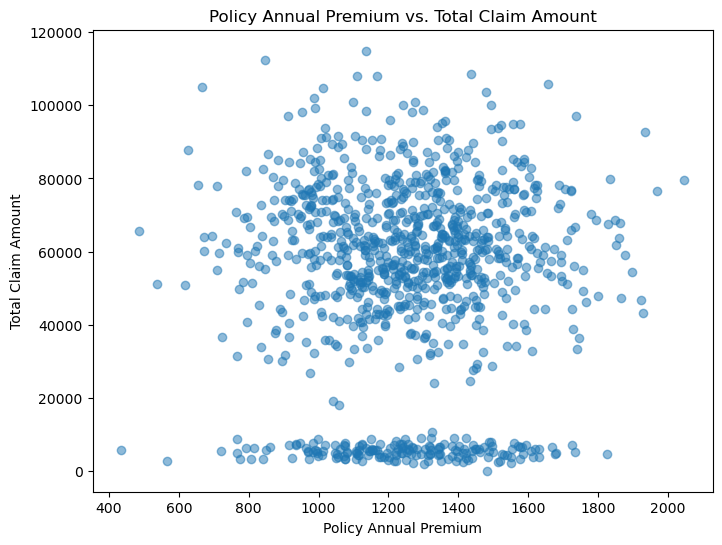

In [19]:
# Scatter plot for policy_annual_premium vs. total_claim_amount
plt.figure(figsize=(8, 6))
plt.scatter(df['policy_annual_premium'], df['total_claim_amount'], alpha=0.5)
plt.xlabel('Policy Annual Premium')
plt.ylabel('Total Claim Amount')
plt.title('Policy Annual Premium vs. Total Claim Amount')
plt.show()


#### Boxplots by Fraud Reported

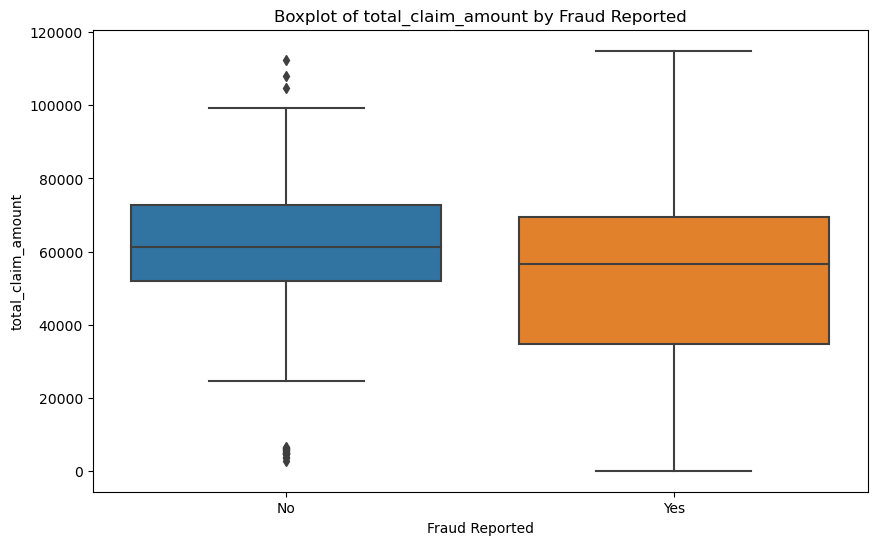

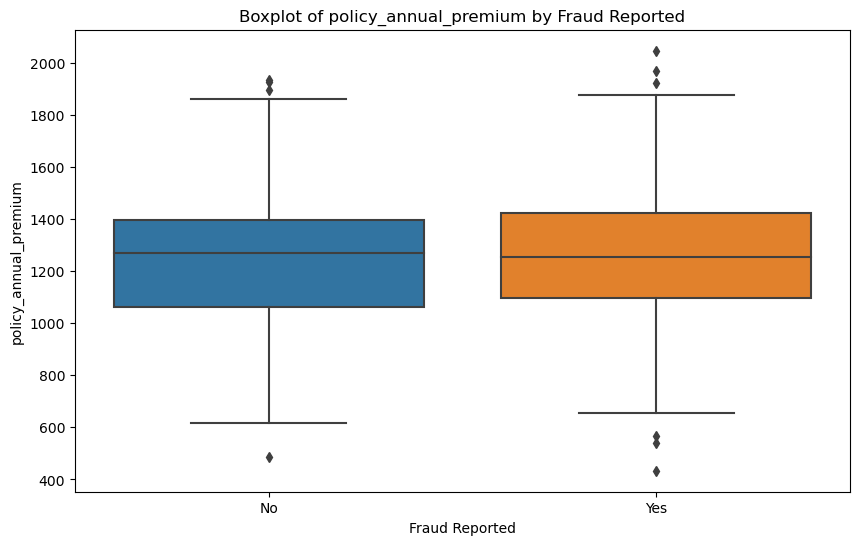

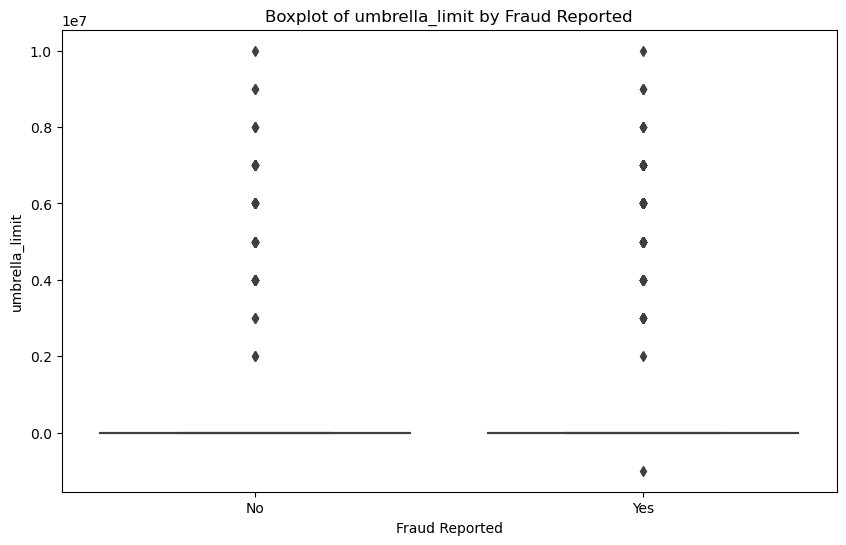

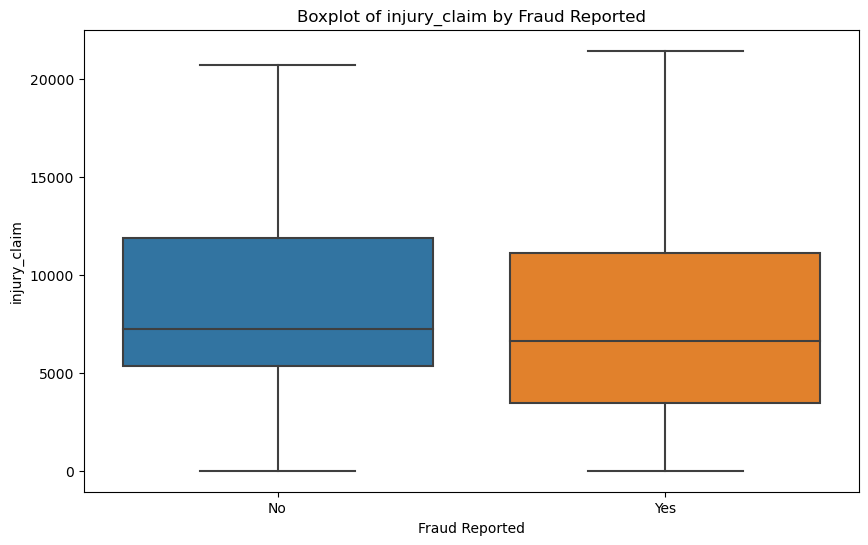

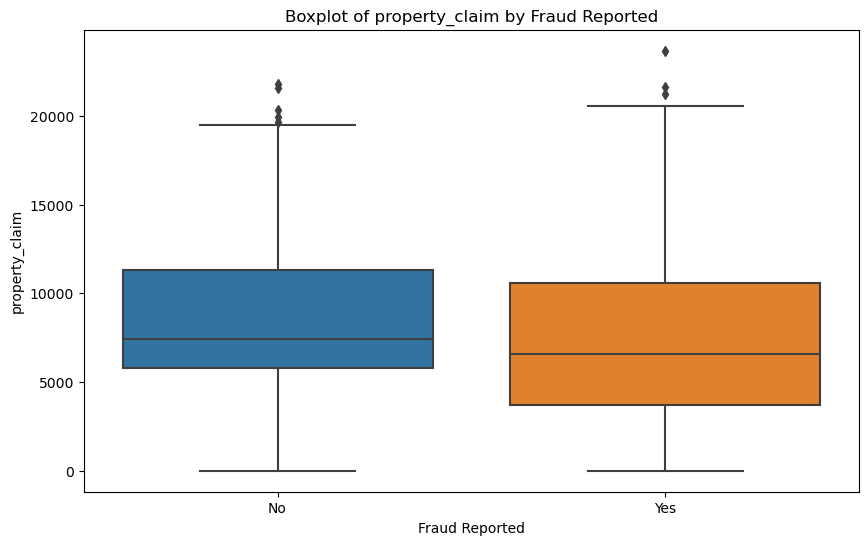

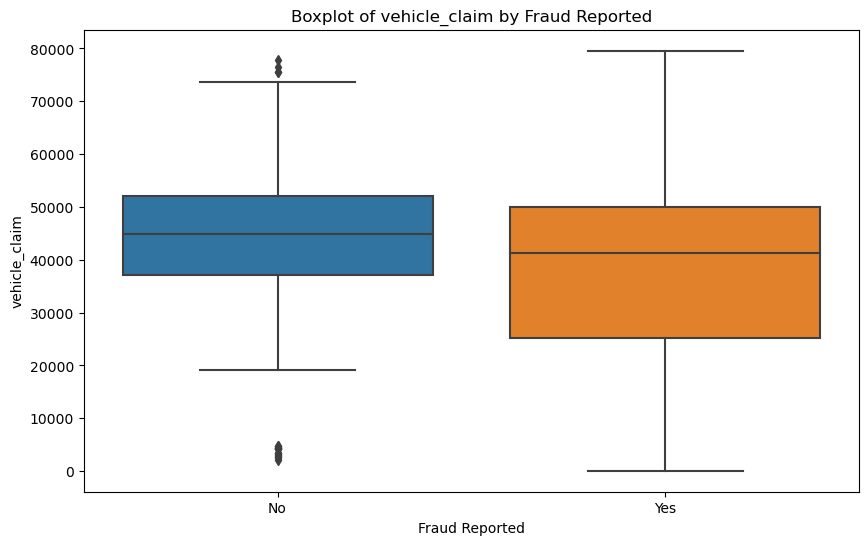

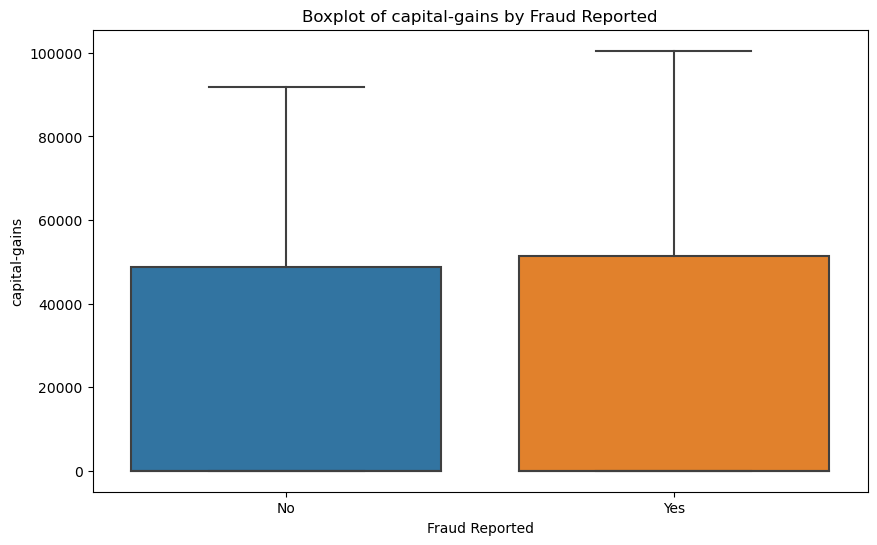

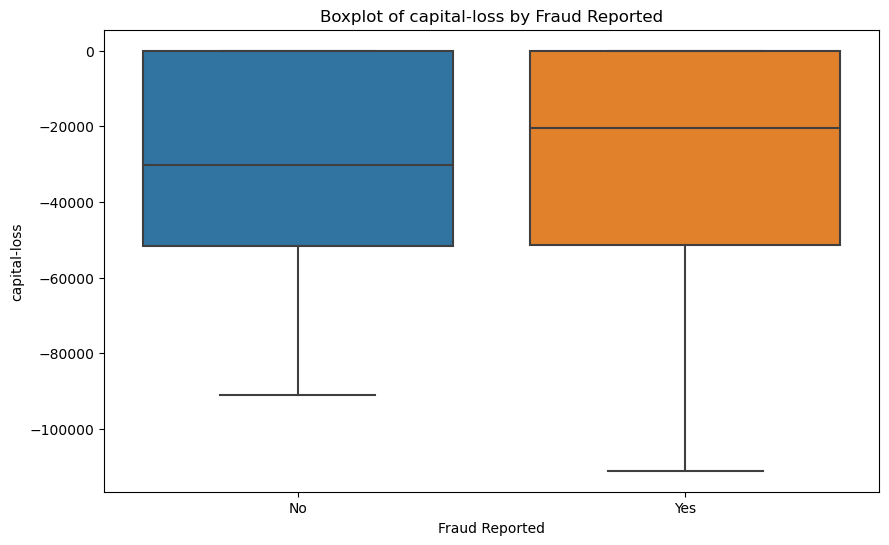

In [20]:
numerical_columns = ['total_claim_amount', 'policy_annual_premium', 'umbrella_limit', 'injury_claim', 'property_claim', 'vehicle_claim', 'capital-gains', 'capital-loss']
# Create boxplots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='fraud_reported', y=column, data=df)
    plt.title(f'Boxplot of {column} by Fraud Reported')
    plt.xlabel('Fraud Reported')
    plt.ylabel(column)
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
    plt.show()

### Statistical Analyses

#### Descriptive Statistics

In [21]:
# Descriptive statistics for numerical columns by target variable
descriptive_stats = df.groupby('fraud_reported')[numerical_columns].describe()
print(descriptive_stats)

               total_claim_amount                                      \
                            count          mean           std     min   
fraud_reported                                                          
N                           753.0  50288.605578  27575.191379   100.0   
Y                           247.0  60302.105263  20746.279567  2860.0   

                                                    policy_annual_premium  \
                    25%      50%      75%       max                 count   
fraud_reported                                                              
N               34650.0  56520.0  69480.0  114920.0                 753.0   
Y               51910.0  61290.0  72665.0  112320.0                 247.0   

                             ... capital-gains           capital-loss  \
                       mean  ...           75%       max        count   
fraud_reported               ...                                        
N               1258.430000  

#### T-Tests

In [22]:
df['fraud_reported'] = df['fraud_reported'].map({'N': 0, 'Y': 1})

for column in numerical_columns:
    fraud = df[df['fraud_reported'] == 1][column]
    no_fraud = df[df['fraud_reported'] == 0][column]
    t_stat, p_value = ttest_ind(fraud, no_fraud, equal_var=False)  # Welch's t-test
    print(f'{column} - T-statistic: {t_stat}, P-value: {p_value}')

total_claim_amount - T-statistic: 6.035779676158822, P-value: 2.9011333511514786e-09
policy_annual_premium - T-statistic: -0.4463556814595241, P-value: 0.6555803399973268
umbrella_limit - T-statistic: 1.7510363432964982, P-value: 0.08074098061697346
injury_claim - T-statistic: 3.014894101416423, P-value: 0.0027151651247680347
property_claim - T-statistic: 4.490107613267643, P-value: 9.132235777569999e-06
vehicle_claim - T-statistic: 6.272671489975523, P-value: 7.174167310144276e-10
capital-gains - T-statistic: -0.6074770919759367, P-value: 0.5438618025802975
capital-loss - T-statistic: -0.4753942397542403, P-value: 0.6347485388397013


#### Cramér's V for Categorical Variables

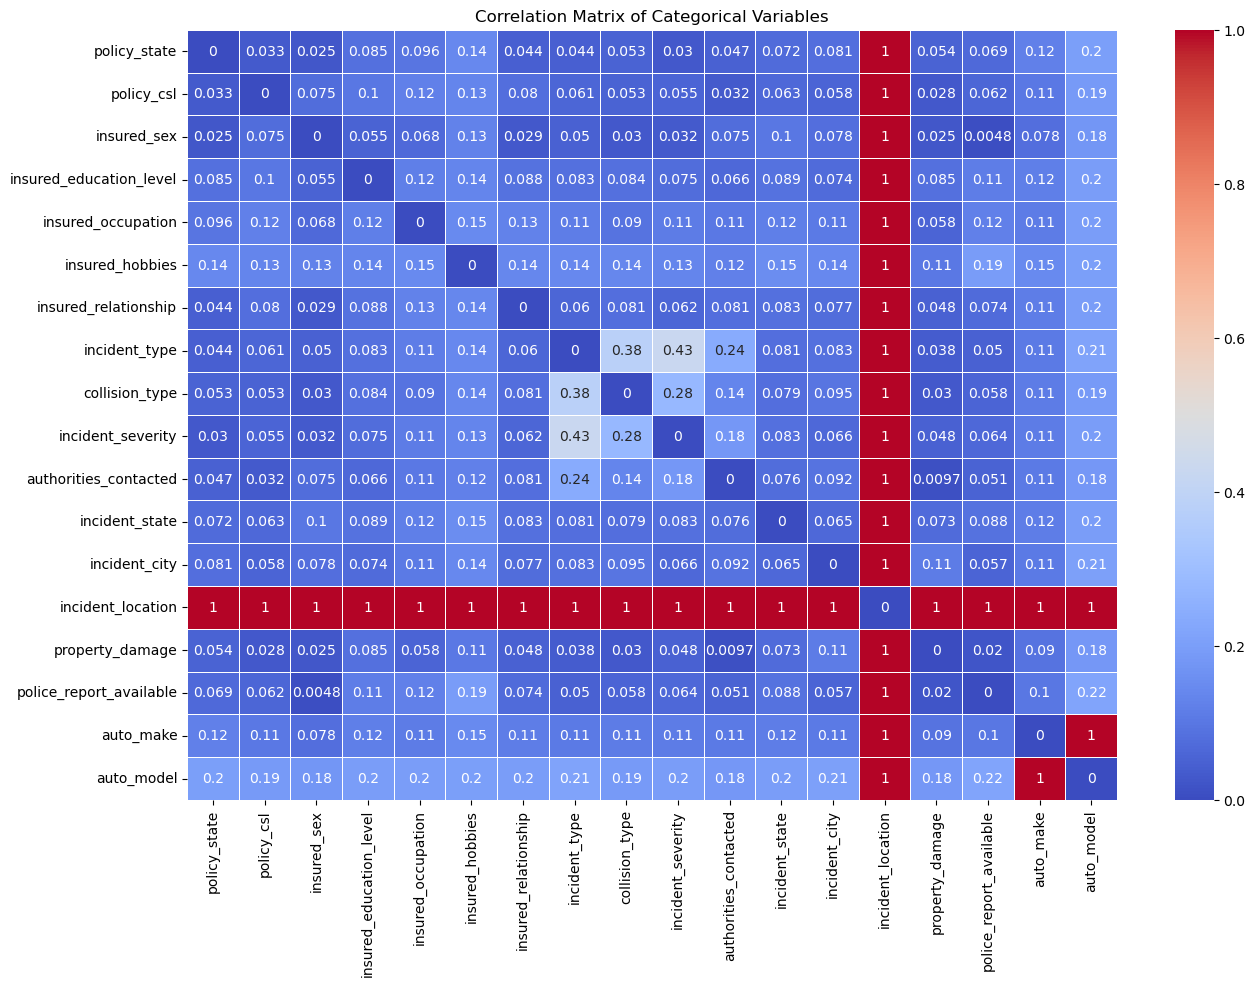

In [23]:
def cramers_v(x, y):
    crosstab = pd.crosstab(x, y)
    chi2_stat, _, _, _ = chi2_contingency(crosstab)
    n = crosstab.sum().sum()
    k = min(crosstab.shape) - 1
    return np.sqrt(chi2_stat / (n * k))

def pairwise_correlation_matrix(df, categorical_columns):
    correlations = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
    for col1, col2 in itertools.combinations(categorical_columns, 2):
        cramer_v = cramers_v(df[col1], df[col2])
        correlations.loc[col1, col2] = cramer_v
        correlations.loc[col2, col1] = cramer_v
    return correlations

# List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()


# Compute pairwise correlation matrix
correlation_matrix = pairwise_correlation_matrix(df, categorical_columns)

correlation_matrix = correlation_matrix.fillna(0)

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Categorical Variables')
plt.show()

### Feature Engineering

#### Date Features

In [24]:
df['policy_bind_date'] = df1['policy_bind_date']
df['incident_date'] = df1['incident_date']

In [25]:
# Convert datetime columns to datetime format
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors='coerce')
df['incident_date'] = pd.to_datetime(df['incident_date'], errors='coerce')

# Extract features from datetime columns
df['policy_bind_year'] = df['policy_bind_date'].dt.year
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['incident_year'] = df['incident_date'].dt.year
df['incident_month'] = df['incident_date'].dt.month
df['incident_day'] = df['incident_date'].dt.day

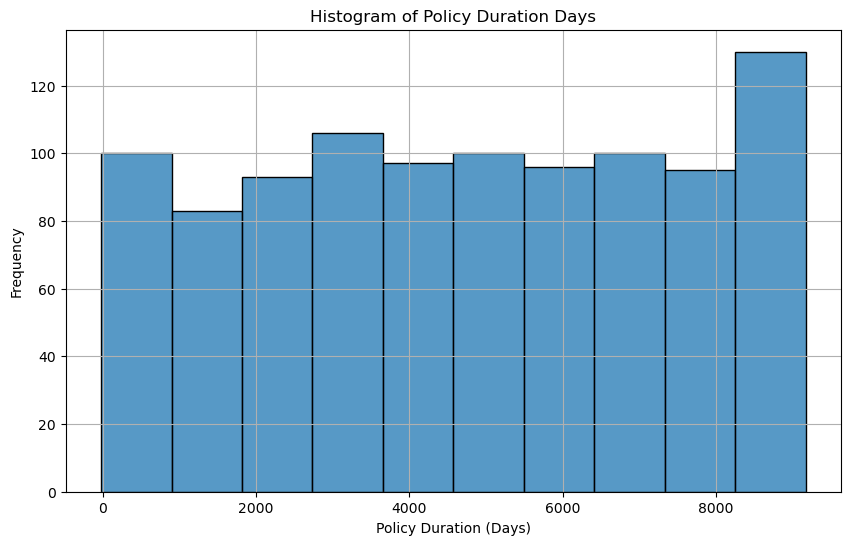

In [26]:
df['policy_duration_days'] = (df['incident_date'] - df['policy_bind_date']).dt.days

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['policy_duration_days'], bins=10, kde=False)
plt.title('Histogram of Policy Duration Days')
plt.xlabel('Policy Duration (Days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Age Binning

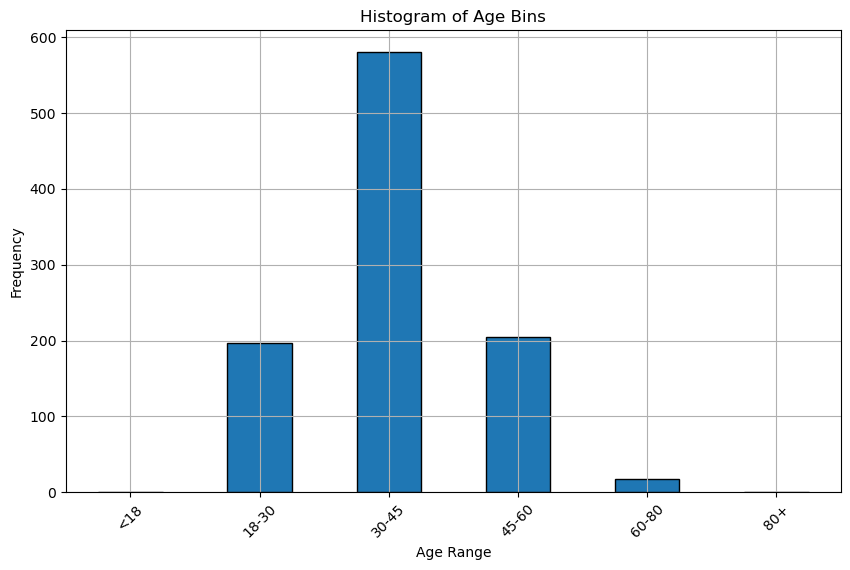

In [27]:
df['age_bin'] = pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 80, 100], labels=['<18', '18-30', '30-45', '45-60', '60-80', '80+'])

# Plot the histogram
plt.figure(figsize=(10, 6))
df['age_bin'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Histogram of Age Bins')
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

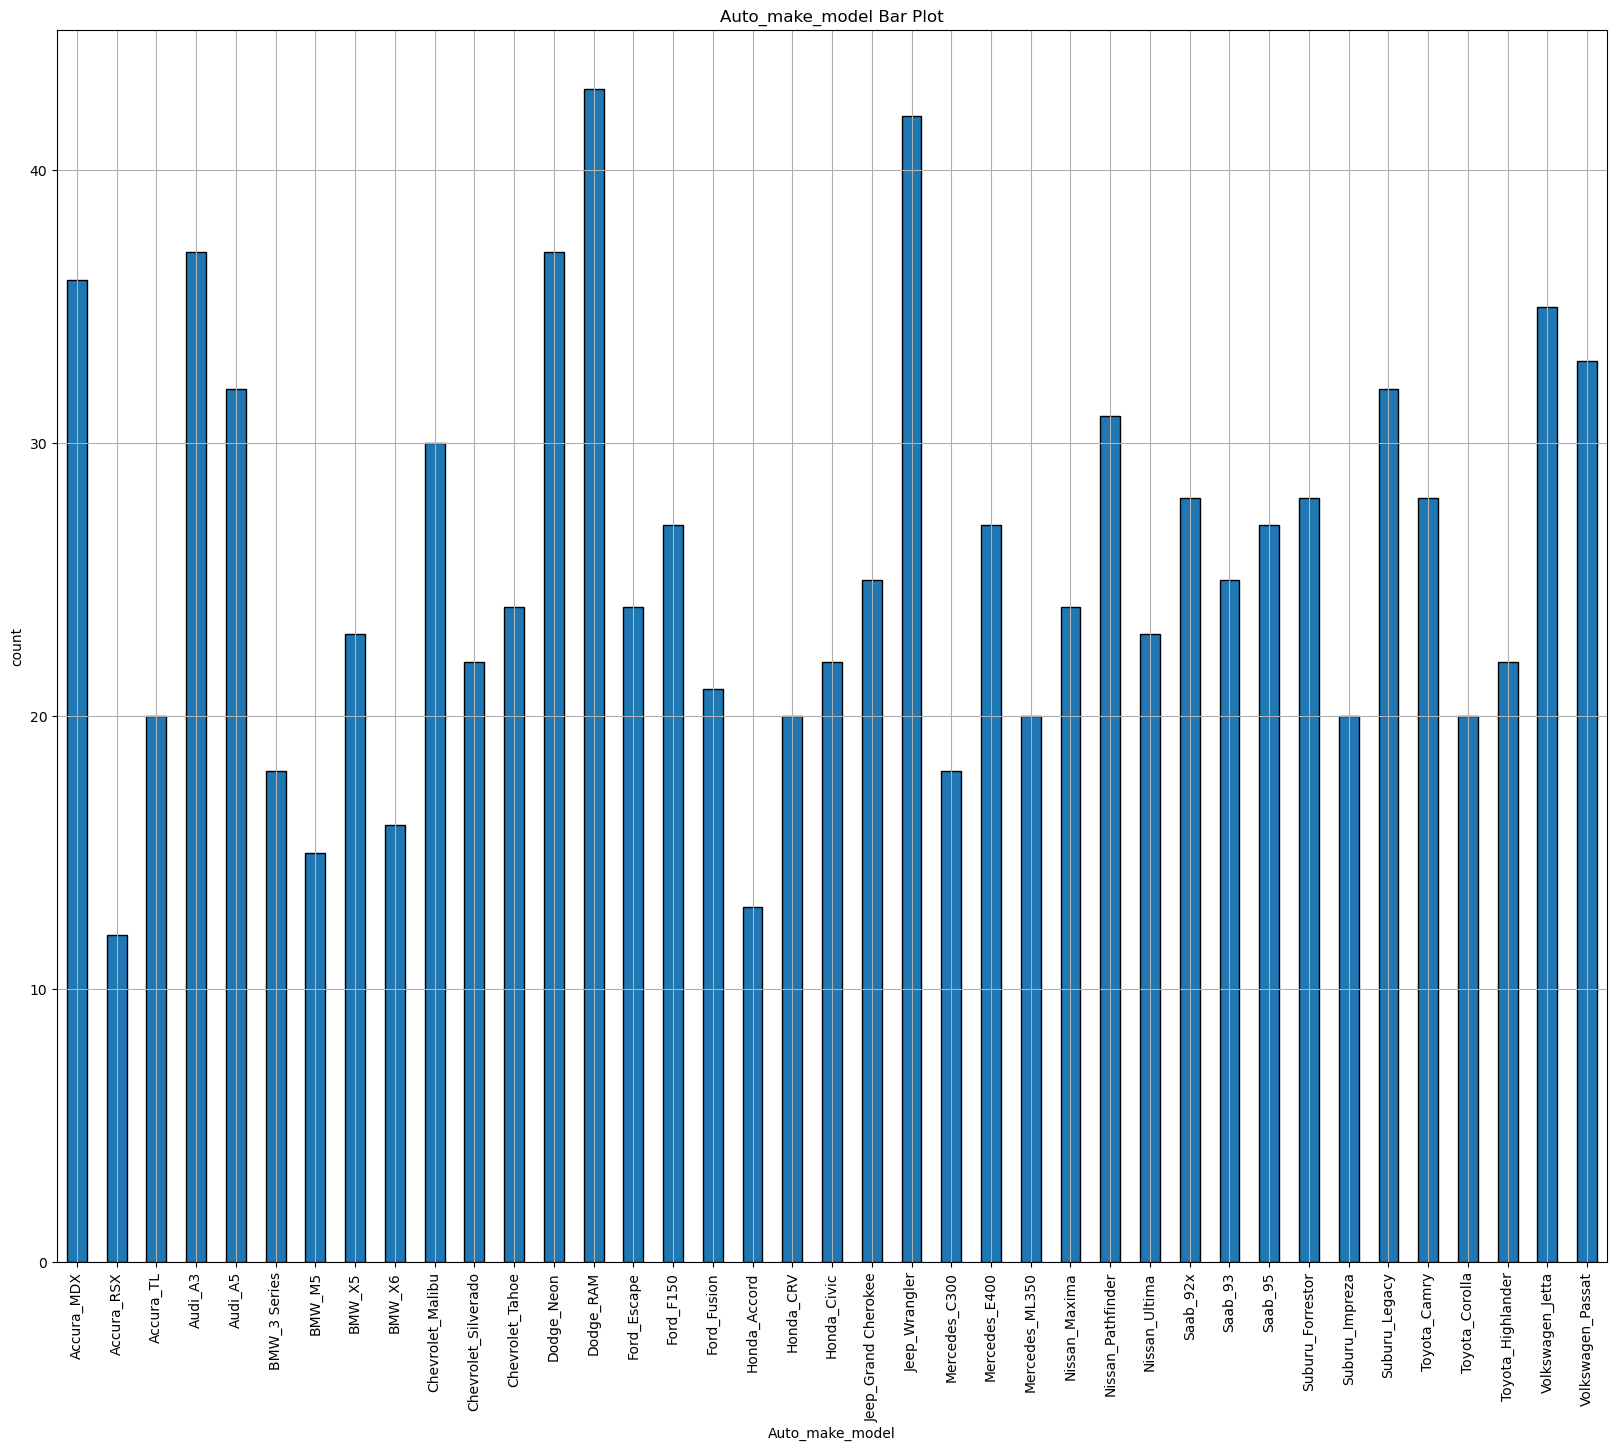

In [28]:
# Create a new column 'auto_make_model' by combining 'auto_make' and 'auto_model'
df['auto_make_model'] = df['auto_make'] + '_' + df['auto_model']

# Plot the histogram
plt.figure(figsize=(20, 16))
df['auto_make_model'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Auto_make_model Bar Plot')
plt.xlabel('Auto_make_model')
plt.ylabel('count')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

#### Claims Ratio

In [29]:
df['injury_claim_ratio'] = df['injury_claim'] / df['total_claim_amount']
df['property_claim_ratio'] = df['property_claim'] / df['total_claim_amount']
df['vehicle_claim_ratio'] = df['vehicle_claim'] / df['total_claim_amount']

print(f"percentage of injury_claim: {df['injury_claim'].sum()*100/ df['total_claim_amount'].sum():.2f}%")
print(f"percentage of property_claim: {df['property_claim'].sum()*100/ df['total_claim_amount'].sum():.2f}%")
print(f"percentage of vehicle_claim: {df['vehicle_claim'].sum()*100/ df['total_claim_amount'].sum():.2f}%")

percentage of injury_claim: 14.09%
percentage of property_claim: 14.02%
percentage of vehicle_claim: 71.89%


#### Total Claims Per Year

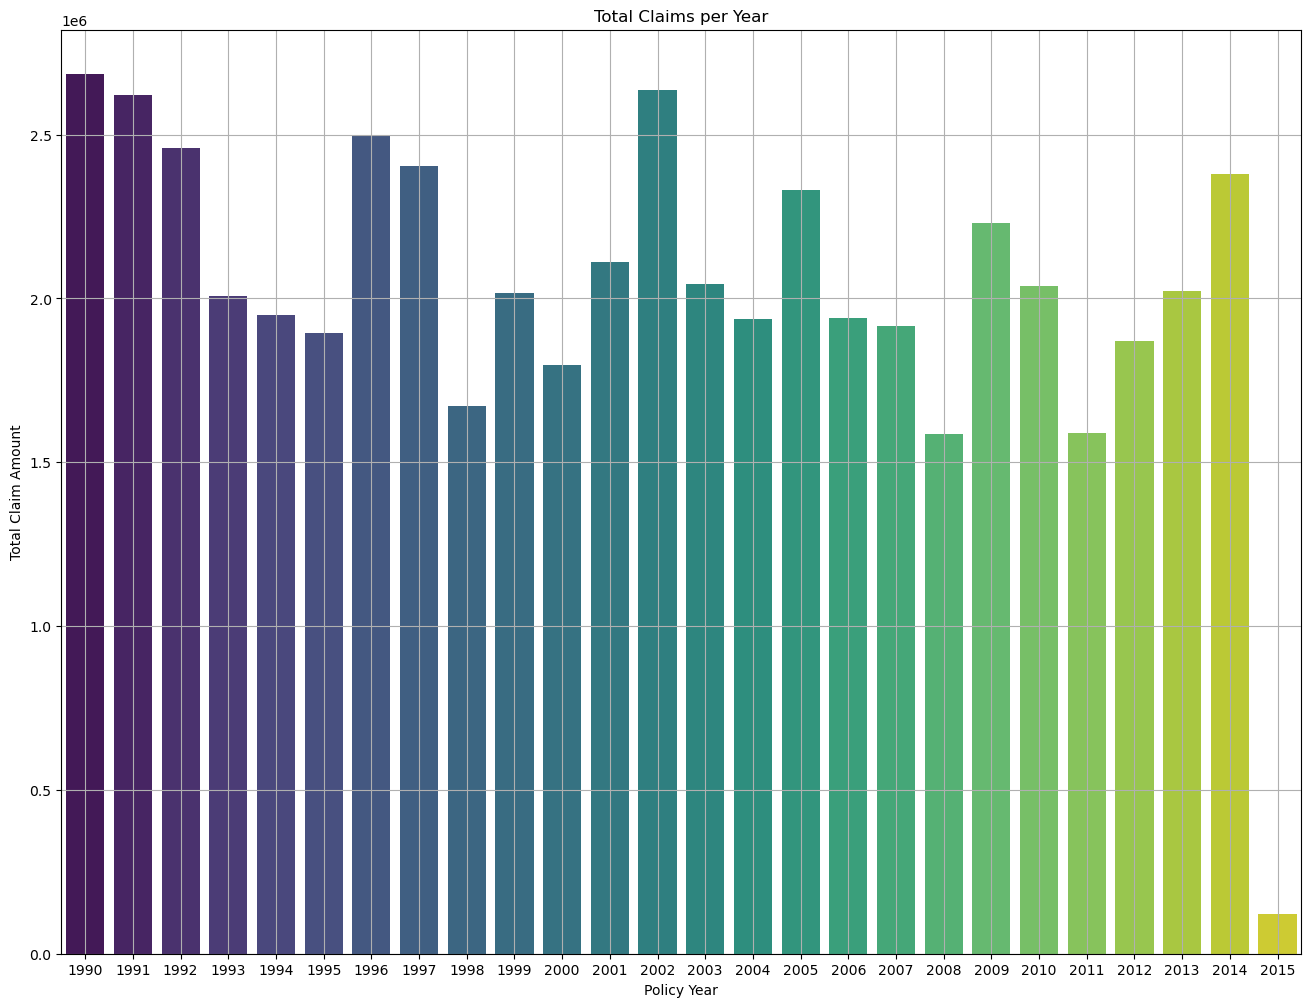

In [30]:
# Group by 'policy_year' and calculate total claims
yearly_claims = df.groupby('policy_bind_year')['total_claim_amount'].sum().reset_index()

# Plotting
plt.figure(figsize=(16, 12))
sns.barplot(data=yearly_claims, x='policy_bind_year', y='total_claim_amount', palette='viridis')
plt.title('Total Claims per Year')
plt.xlabel('Policy Year')
plt.ylabel('Total Claim Amount')
plt.grid(True)
plt.show()

In [31]:
df.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,policy_bind_day,incident_year,incident_month,incident_day,policy_duration_days,age_bin,auto_make_model,injury_claim_ratio,property_claim_ratio,vehicle_claim_ratio
0,328.0,48.0,521585.0,1000.0,1406.91,0.0,466132.0,53300.0,0.0,5.0,...,17,2015,1,25,100,45-60,Saab_92x,0.090909,0.181818,0.727273
1,228.0,42.0,342868.0,2000.0,1197.22,5000000.0,468176.0,0.0,0.0,8.0,...,27,2015,1,21,3130,30-45,Mercedes_E400,0.153846,0.153846,0.692308
2,134.0,29.0,687698.0,2000.0,1413.14,5000000.0,430632.0,35100.0,0.0,7.0,...,6,2015,2,22,5282,18-30,Dodge_RAM,0.222222,0.111111,0.666667
3,256.0,41.0,227811.0,2000.0,1415.74,6000000.0,608117.0,48900.0,-62400.0,5.0,...,25,2015,1,10,8996,30-45,Chevrolet_Tahoe,0.100000,0.100000,0.800000
4,228.0,44.0,367455.0,1000.0,1583.91,6000000.0,610706.0,66000.0,-46000.0,20.0,...,6,2015,2,17,256,30-45,Accura_RSX,0.200000,0.100000,0.700000


In [32]:
df.to_csv("insurance_claims_updated.csv", index=False)

### Recursive Feature Elimination

In [59]:
df_1 = df.copy()

In [60]:
df_1 = df_1.drop(columns = ['policy_number', 'age', 'insured_zip', 'policy_bind_date', 'incident_date', 'incident_year',
                            'incident_location', 'injury_claim_ratio', 'property_claim_ratio', 'vehicle_claim_ratio',
                            'auto_model', 'auto_make', 'auto_make_model', 'insured_occupation', 'incident_city', 'incident_month'])

In [61]:
categorical_cols = df_1.select_dtypes(include=['object', 'category']).columns

df_1 = pd.get_dummies(df_1, columns=categorical_cols)

In [62]:
df_1 = df_1.astype(int)

In [63]:
from collections import Counter

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Feature importance from Random Forest
X = df_1.drop('fraud_reported', axis=1)
y = df_1['fraud_reported']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check the balance of the resampled training set
print("Resampled training data distribution:", Counter(y_train))

# Standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Calculate and print ROC AUC score
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print("ROC AUC Score:")
print(roc_auc_rf)

Resampled training data distribution: Counter({0: 608, 1: 608})
Random Forest Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       145
           1       0.55      0.40      0.46        55

    accuracy                           0.74       200
   macro avg       0.67      0.64      0.65       200
weighted avg       0.73      0.74      0.73       200

Confusion Matrix:
[[127  18]
 [ 33  22]]
ROC AUC Score:
0.8071473354231975


In [38]:
# Initialize RFE with the RandomForestClassifier and the number of features to select
rfe = RFE(estimator=rf, n_features_to_select= 20, step=1)  # Adjust n_features_to_select as needed

# Fit RFE
rfe.fit(X_train, y_train)

# Transform the data to select only the important features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the RandomForestClassifier on the reduced feature set
rf.fit(X_train_rfe, y_train)

# Predict on the test set
y_pred = rf.predict(X_test_rfe)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC Score:")
print(roc_auc_score(y_test, y_pred))

Accuracy with selected features: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       145
           1       0.61      0.71      0.66        55

    accuracy                           0.80       200
   macro avg       0.75      0.77      0.75       200
weighted avg       0.81      0.80      0.80       200

Confusion Matrix:
[[120  25]
 [ 16  39]]
ROC AUC Score:
0.7683385579937304


In [39]:
# Print feature ranking and selected features
print("Feature Ranking:")
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
for feature, rank in feature_ranking.items():
    print(f"{feature}: Rank {rank}")

Feature Ranking:
months_as_customer: Rank 1
policy_deductable: Rank 6
policy_annual_premium: Rank 1
umbrella_limit: Rank 11
capital-gains: Rank 1
capital-loss: Rank 4
incident_hour_of_the_day: Rank 1
number_of_vehicles_involved: Rank 12
bodily_injuries: Rank 9
witnesses: Rank 8
total_claim_amount: Rank 1
injury_claim: Rank 1
property_claim: Rank 1
vehicle_claim: Rank 1
auto_year: Rank 1
policy_bind_year: Rank 1
policy_bind_month: Rank 1
policy_bind_day: Rank 1
incident_day: Rank 1
policy_duration_days: Rank 1
policy_state_IL: Rank 26
policy_state_IN: Rank 22
policy_state_OH: Rank 25
policy_csl_100/300: Rank 7
policy_csl_250/500: Rank 38
policy_csl_500/1000: Rank 1
insured_sex_FEMALE: Rank 1
insured_sex_MALE: Rank 13
insured_education_level_Associate: Rank 29
insured_education_level_College: Rank 47
insured_education_level_High School: Rank 34
insured_education_level_JD: Rank 35
insured_education_level_MD: Rank 41
insured_education_level_Masters: Rank 33
insured_education_level_PhD: Ran

In [40]:
def get_original_categorical_features(feature_ranking, categorical_cols):
    original_features = {}
    
    # Iterate over each categorical column
    for cat_col in categorical_cols:
        # Find one-hot encoded columns that start with the categorical column name
        cat_encoded_cols = [col for col in feature_ranking.index if col.startswith(cat_col + '_')]
        
        if cat_encoded_cols:
            original_features[cat_col] = cat_encoded_cols
    
    return original_features

def calculate_categorical_feature_ranks(feature_ranking, categorical_cols):
    original_features = get_original_categorical_features(feature_ranking, categorical_cols)
    categorical_feature_ranks = {}

    # For each original feature, find the minimum rank of its encoded columns
    for original_feature, cat_encoded_col in original_features.items():
        min_rank = feature_ranking[cat_encoded_col].min()
        categorical_feature_ranks[original_feature] = min_rank
    
    return categorical_feature_ranks


In [41]:
# Calculate categorical feature ranks
categorical_feature_ranks = calculate_categorical_feature_ranks(feature_ranking, categorical_cols)
print("categorical_feature_ranks:")
print(categorical_feature_ranks)

categorical_feature_ranks:
{'policy_state': 22, 'policy_csl': 1, 'insured_sex': 1, 'insured_education_level': 29, 'insured_hobbies': 1, 'insured_relationship': 3, 'incident_type': 19, 'collision_type': 5, 'incident_severity': 1, 'authorities_contacted': 10, 'incident_state': 2, 'property_damage': 21, 'police_report_available': 23, 'age_bin': 20}


In [42]:
# Collect all one-hot encoded columns
one_hot_encoded_columns = []
for cat_col in categorical_cols:
    cat_encoded_cols = [col for col in feature_ranking.index if col.startswith(cat_col + '_')]
    one_hot_encoded_columns.extend(cat_encoded_cols)

# Calculate numerical feature ranks by dropping one-hot encoded columns
numerical_feature_ranks = feature_ranking.drop(labels=one_hot_encoded_columns)
print("Numerical Feature Ranks:")
print(numerical_feature_ranks)


Numerical Feature Ranks:
months_as_customer              1
policy_deductable               6
policy_annual_premium           1
umbrella_limit                 11
capital-gains                   1
capital-loss                    4
incident_hour_of_the_day        1
number_of_vehicles_involved    12
bodily_injuries                 9
witnesses                       8
total_claim_amount              1
injury_claim                    1
property_claim                  1
vehicle_claim                   1
auto_year                       1
policy_bind_year                1
policy_bind_month               1
policy_bind_day                 1
incident_day                    1
policy_duration_days            1
dtype: int32


### RandomForest Model

In [43]:
# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_rf.fit(X_train_rfe, y_train)

# Print the best parameters and best score
print("Random Forest Best Parameters:", grid_search_rf.best_params_)
print("Random Forest Best Score:", grid_search_rf.best_score_)

# Use the best model to predict
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_rfe)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, best_rf.predict_proba(X_test_rfe)[:, 1]))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Best Score: 0.9329067654878165
Random Forest Accuracy: 0.795
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       145
           1       0.61      0.71      0.66        55

    accuracy                           0.80       200
   macro avg       0.75      0.77      0.75       200
weighted avg       0.81      0.80      0.80       200

Confusion Matrix:
[[120  25]
 [ 16  39]]
ROC AUC Score: 0.7932915360501567


### XGBoost

In [44]:
# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the model
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_xgb.fit(X_train_rfe, y_train)

# Print the best parameters and best score
print("XGBoost Best Parameters:", grid_search_xgb.best_params_)
print("XGBoost Best Score:", grid_search_xgb.best_score_)

# Use the best model to predict
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_rfe)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, best_xgb.predict_proba(X_test_rfe)[:, 1]))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGBoost Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
XGBoost Best Score: 0.9306461428434994
XGBoost Accuracy: 0.825
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       145
           1       0.69      0.65      0.67        55

    accuracy                           0.82       200
   macro avg       0.78      0.77      0.78       200
weighted avg       0.82      0.82      0.82       200

Confusion Matrix:
[[129  16]
 [ 19  36]]
ROC AUC Score: 0.8461442006269592


### Support Vector Machine

In [45]:
# Define the parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize the model
svm_model = SVC(probability=True, random_state=42)

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_svm.fit(X_train_rfe, y_train)

# Print the best parameters and best score
print("SVM Best Parameters:", grid_search_svm.best_params_)
print("SVM Best Score:", grid_search_svm.best_score_)

# Use the best model to predict
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_rfe)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("ROC AUC Score:", roc_auc_score(y_test, best_svm.predict_proba(X_test_rfe)[:, 1]))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
SVM Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
SVM Best Score: 0.9158826050937166
SVM Accuracy: 0.805
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       145
           1       0.62      0.76      0.68        55

    accuracy                           0.81       200
   macro avg       0.76      0.79      0.77       200
weighted avg       0.82      0.81      0.81       200

Confusion Matrix:
[[119  26]
 [ 13  42]]
ROC AUC Score: 0.8473981191222569


#### XGBoost has the highest accuracy (82.5%) and the highest ROC AUC score (0.846), indicating its strong performance overall.

In [47]:
# Initialize your individual models
rf = RandomForestClassifier(class_weight='balanced', max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)
xgb = xgb.XGBClassifier(colsample_bytree=1.0, learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8, random_state=42)
svm = SVC(C=10, gamma='scale', kernel='linear', probability=True, random_state=42)

# Create the voting classifier
voting_clf = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb), ('svm', svm)], voting='soft')

# Train the ensemble model
voting_clf.fit(X_train_rfe, y_train)

# Predict and evaluate
y_pred_vc = voting_clf.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred_vc)
print(f"Voting Classifier Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_vc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_vc))
print("ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_vc))

Voting Classifier Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       145
           1       0.66      0.75      0.70        55

    accuracy                           0.82       200
   macro avg       0.78      0.80      0.79       200
weighted avg       0.83      0.82      0.83       200

Confusion Matrix:
[[124  21]
 [ 14  41]]
ROC AUC Score:
0.8003134796238244


In [48]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Create the base models
base_models = [('rf', rf), ('xgb', xgb), ('svm', svm)]

# Create the stacking classifier with a logistic regression meta-model
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Train the stacking model
stacking_clf.fit(X_train_rfe, y_train)

# Predict and evaluate
y_pred_sc = stacking_clf.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred_sc)
print(f"Stacking Classifier Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_sc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_sc))
print("ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_sc))

Stacking Classifier Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       145
           1       0.66      0.75      0.70        55

    accuracy                           0.82       200
   macro avg       0.78      0.80      0.79       200
weighted avg       0.83      0.82      0.83       200

Confusion Matrix:
[[124  21]
 [ 14  41]]
ROC AUC Score:
0.8003134796238244
